In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import random
from pandas_profiling import ProfileReport



In [2]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# getting the statistical measures of the data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

- DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

In [6]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
print(df.value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [8]:
#Calculating the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df['Outcome'].value_counts(normalize=True).apply(lambda x:x*100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

- The Outcome variable is theclassifier that is used to make predictions if the patient has or does not have diabetes depending on the measurements of the most similar labeled ponts of the given data .Therefore in this case if the outcome shows;

       * 1 = Has Diabetes
       * 0 = Does Not Have Diabetes

   # Exploratory Data Analysis:  PLOTS 
  

In [10]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [11]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

# Plotting 
missing_plot(df, 'Outcome')


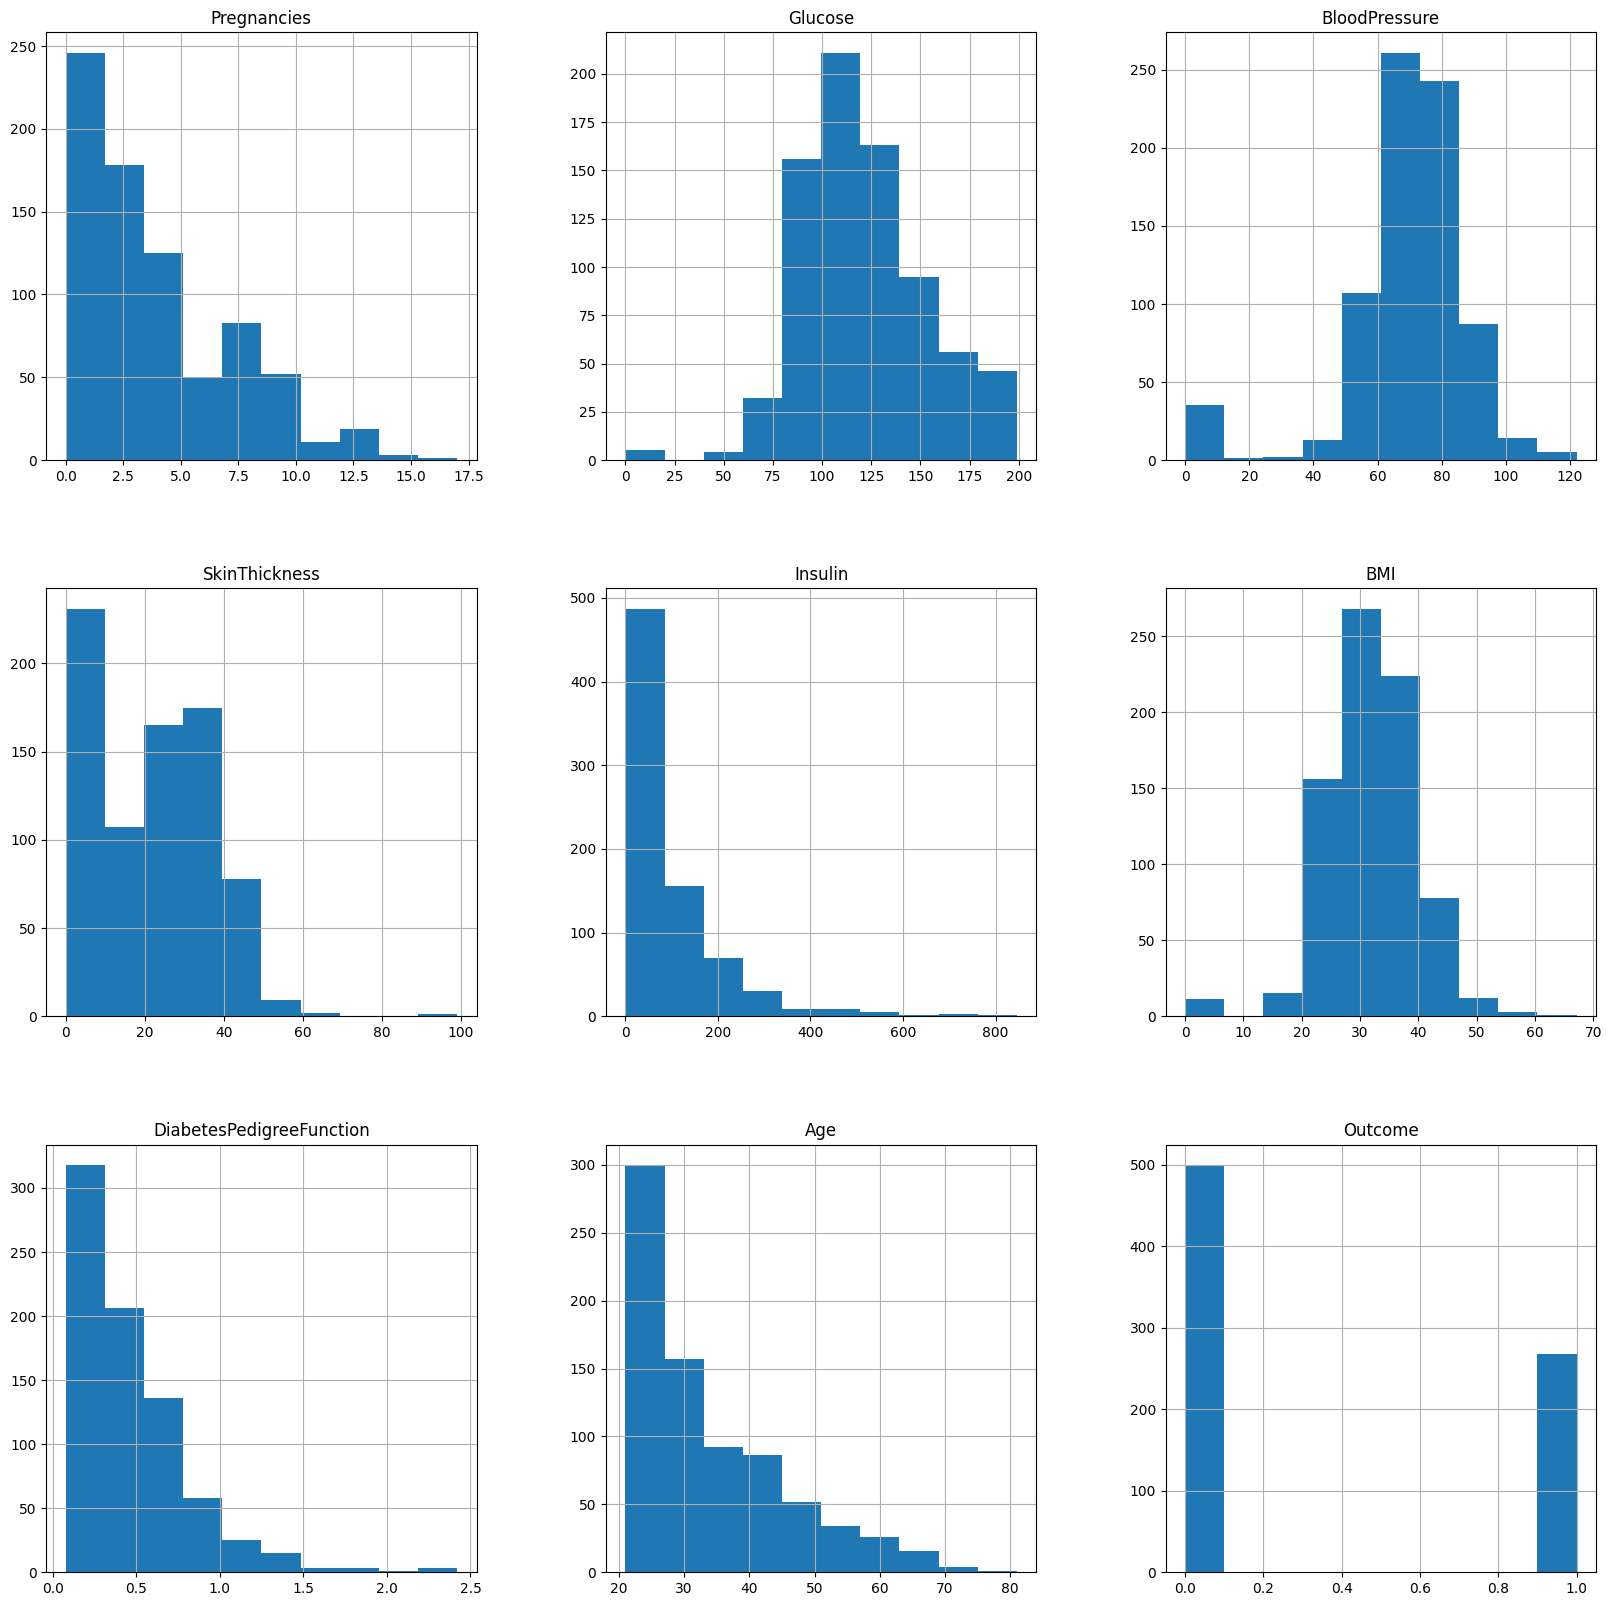

In [12]:
p = df.hist(figsize = (20,20))

In [13]:
# Count Plot for Age

fig = px.bar(x = df['Outcome'].value_counts().index, y = df['Outcome'].value_counts(),
             color = df['Outcome'].value_counts().index)

fig.update_layout(title='Outcome Distribution',
                   xaxis_title='Outcome',
                   yaxis_title='Count')
fig.show()

In [14]:
tmp = df['Outcome'].value_counts()
tmp = tmp.reset_index()
tmp.columns = ['Outcome','count']
fig = px.bar(tmp, x="Outcome", y="count", color='Outcome')
fig.show()

In [15]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

plot_distribution('Insulin', 0)
    

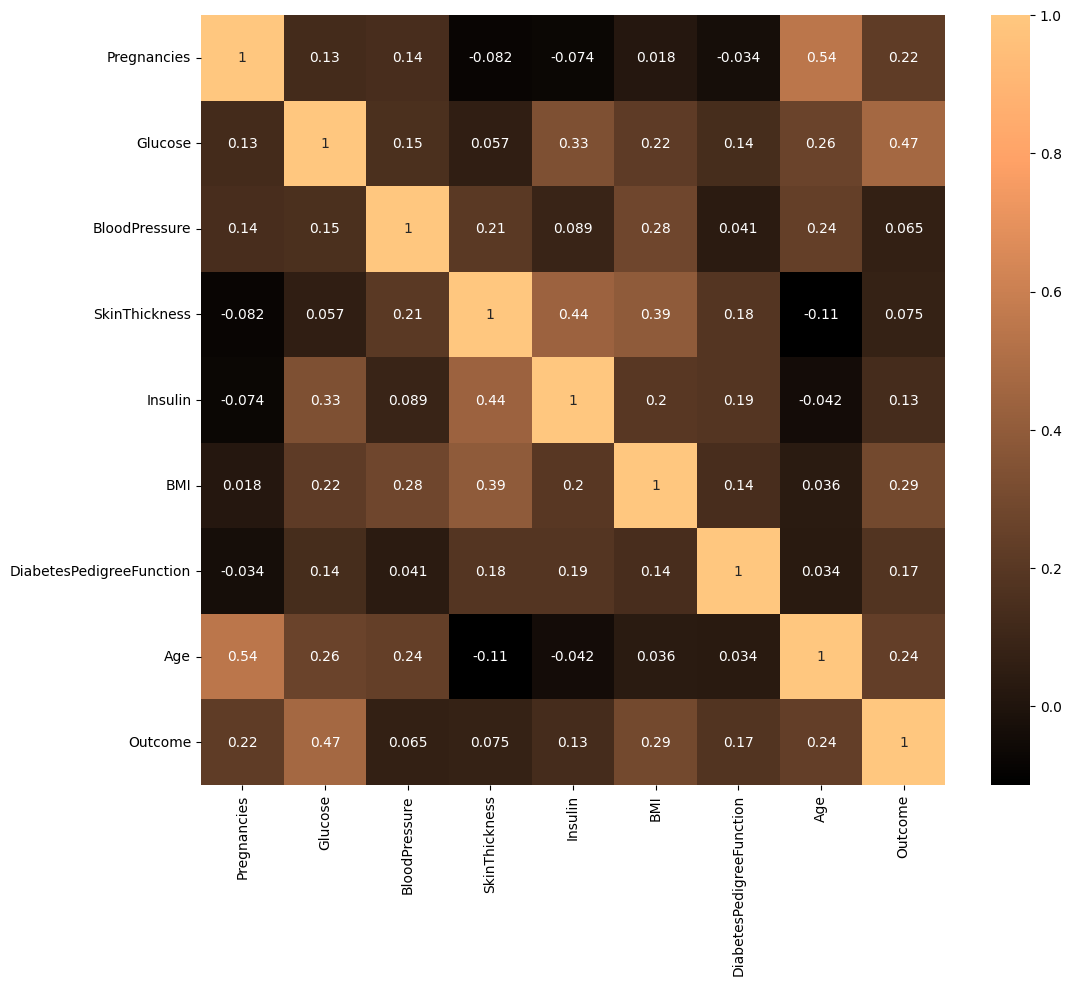

In [16]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True, cmap='copper')

In [17]:
#Get the profile of the data 
profile = ProfileReport(df)
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Scaling the data

In [18]:
#Identifying the Variables

X = df.drop('Outcome', axis=1)
X

y= df['Outcome']
y


from sklearn.model_selection import train_test_split
#Splitting the Dataset
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#Sizes of the Set 
print('The Training Set:', (X_train.shape, y_train.shape))
print('The Test Set:', (X_test.shape, y_test.shape))

The Training Set: ((537, 8), (537,))
The Test Set: ((231, 8), (231,))


In [19]:
#Checking if the Training data set is balanced 
pd.Series(y_train).value_counts(normalize=True)


0    0.662942
1    0.337058
Name: Outcome, dtype: float64

In [20]:
#Analysing the Testing Set
pd.Series(y_test).value_counts(normalize=True)

0    0.623377
1    0.376623
Name: Outcome, dtype: float64

# PREDICTIONS

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[-0.53788077 -0.98266127  1.07584045 ...  0.19662751 -0.51280558
   0.74882677]
 [ 0.06137644  0.74886132  0.81461495 ... -0.39218237 -0.8218938
  -0.52209603]
 [ 1.85914807 -0.31435431  0.03093844 ... -0.57138538 -0.96593491
   0.57937039]
 ...
 [-0.23825217 -0.16246636  0.23991884 ... -0.72498795 -1.06796403
  -0.77628059]
 [-0.83750938 -1.01303886 -2.05886558 ...  2.94867368  0.09936914
  -0.60682422]
 [ 0.36100504 -0.77001815  0.23991884 ...  0.20942772  1.60279824
   0.83355495]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6883116883116883

In [24]:
#predictions on The Test set
y_pred = knn.predict(X_test)
y_pred

#The Predictions of the Training Set
y_train_pred = knn.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [25]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(y_test)
test_scores_ind = [i for i, v in enumerate(y_test) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score 100 % and k = [4, 8, 13, 15, 20, 21, 24, 26, 28, 29, 30, 35, 37, 41, 42, 43, 45, 49, 52, 64, 67, 70, 71, 72, 74, 77, 78, 80, 82, 85, 86, 88, 89, 92, 97, 101, 102, 103, 107, 108, 112, 115, 118, 120, 126, 128, 131, 132, 136, 138, 139, 140, 143, 145, 148, 149, 150, 151, 153, 155, 159, 164, 166, 168, 174, 175, 176, 178, 179, 180, 186, 193, 195, 196, 200, 203, 204, 207, 209, 210, 213, 214, 216, 220, 224, 225, 228]


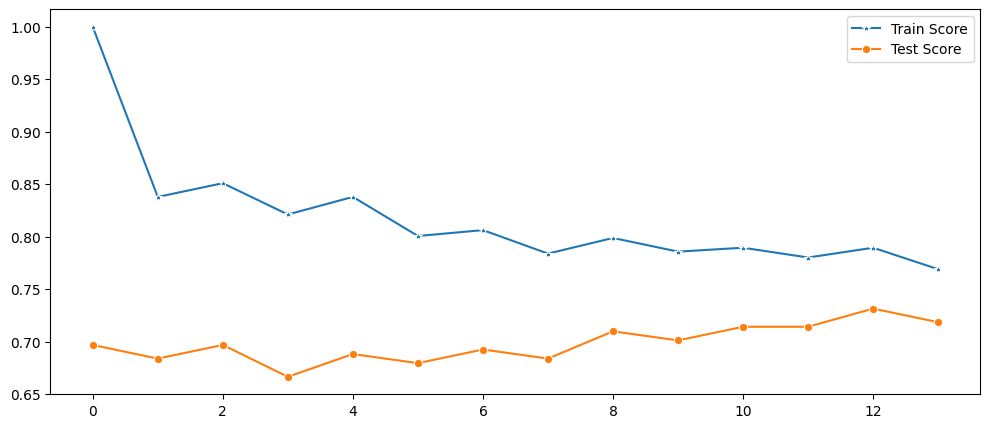

In [40]:
test_score_list = []
train_score_list = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    test_score_list.append(knn.score(X_test, y_test))
    train_score_list.append(knn.score(X_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(train_score_list,marker='*',label='Train Score')
p = sns.lineplot(test_score_list,marker='o',label='Test Score')



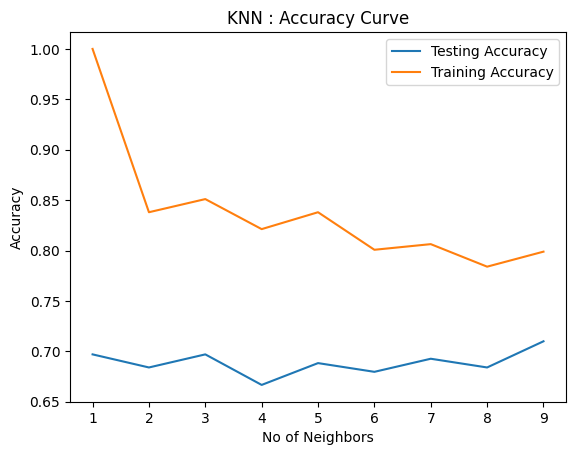

In [44]:
#instead of randomly selecting the values of n_neighbors, its better to plot the accuracy curve and then select the value of n_neighbors.
import matplotlib.pyplot as plt
import pylab
import numpy as np
neighbors  = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy')
plt.plot(neighbors,train_accuracy,label = 'Training Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
pylab.legend(loc = 'upper right')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

#The Accuracy Scores 

print('The Accuracy Scores of the Training Set: {:.3}'.format(knn.score(X_train,y_train)*100))
print('The Accuracy Scores of the Test Set: {:.3}'.format(knn.score(X_test,y_test)*100))
print('The Accuracy of the model: {:.3}'.format(accuracy_score(y_test, y_pred)*100))
print('Traing Set Predictions Accuracy: {:.3}'.format(accuracy_score(y_train_pred, y_train)*100))

The Accuracy Scores of the Training Set: 83.8
The Accuracy Scores of the Test Set: 68.8
The Accuracy of the model: 68.8
Traing Set Predictions Accuracy: 83.8


In [30]:
from sklearn.pipeline import Pipeline

Pipeline = X
Pipeline

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [38]:
#Selecting The K values
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

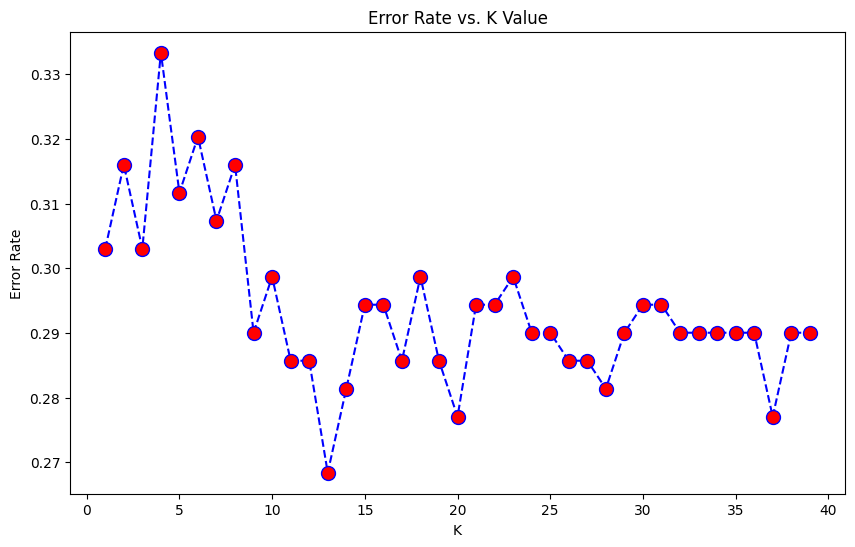

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          123  21  144
1           51  36   87
All        174  57  231

# CLASSIFICATION REPORT

- Classification Report mostly includes Precision, Recall and F1 Score ;
    
    *Precision - 
      =>Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    
    Accuracy of positive predictions.
        = TP/(TP + FP)

    *Recall - 
        =>Recall is the ratio of correctly predicted positive observations to the all observations in actual class
    Fraction of positives that were correctly identified.
        = TP/(TP+FN)
        
    *F1 Score - 
    =>F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
         = 2 x (precision x recall)/(precision + recall)
    

In [34]:
# Import The Classification Report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       144
           1       0.63      0.41      0.50        87

    accuracy                           0.69       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.68      0.69      0.67       231



In [35]:
#Classification Report
print("RECALL SCORE:")
print("Train Recall : ",metrics.recall_score(y_train,y_train_pred)*100)
print("Test Recall : ", metrics.recall_score(y_test,y_pred)*100)
print("PRECISION SCORE:")
print("Train Precision : ",metrics.precision_score(y_train,y_train_pred)*100)
print("Test Precision : ",metrics.precision_score(y_test,y_pred)*100)
print("F1 SCORE:")
print("Train Accuracy :", metrics.f1_score(y_train,y_train_pred)*100)
print("Test Accuracy :", metrics.f1_score(y_test,y_pred)*100)


RECALL SCORE:
Train Recall :  74.58563535911603
Test Recall :  41.37931034482759
PRECISION SCORE:
Train Precision :  76.70454545454545
Test Precision :  63.1578947368421
F1 SCORE:
Train Accuracy : 75.63025210084034
Test Accuracy : 50.0


In [36]:
# ACCURACY SCORE

acc = accuracy_score(y_test,y_pred, normalize=True)*100
print('\nCV accuracy for k = %d is %d%%' % (5, acc))



CV accuracy for k = 5 is 68%


In [37]:
#Let’s measure this model's RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.5582905262390825

   # BETTER EVALUATION WITH CROSS VALIDATION

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

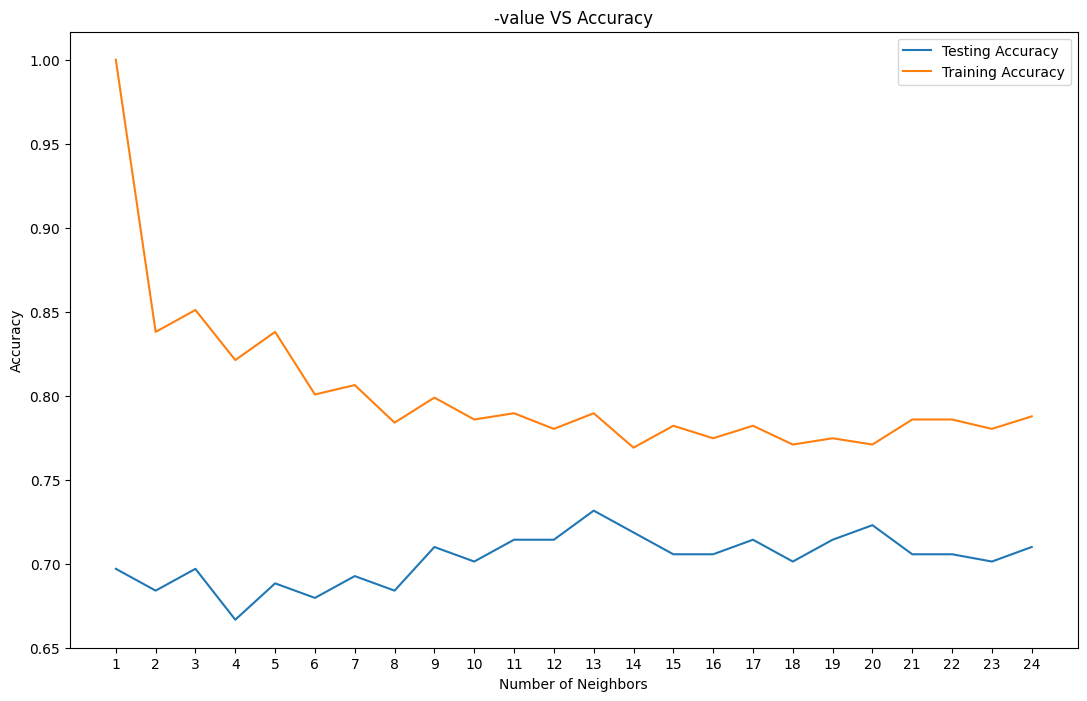

Best accuracy is 0.7316017316017316 with K = 13


In [49]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
